In [60]:
from pearce.mocks.kittens import cat_dict
import numpy as np

In [61]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [62]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0}

In [63]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [64]:
cat.load(2.0/3.0, HOD='abRedMagic')

In [65]:
cat.model.param_dict

{'alpha': 1.02,
 'f_c': 0.19,
 'logM0': 12.2,
 'logM1': 13.7,
 'logMmin': 12.1,
 'mean_occupation_centrals_assembias_param1': 0.5,
 'mean_occupation_satellites_assembias_param1': 0.5,
 'sigma_logM': 0.46}

In [66]:
fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}

In [67]:
cat.model._input_model_dictionary['centrals_occupation']._get_assembias_param_dict_key(0)

'mean_occupation_centrals_assembias_param1'

In [68]:
fiducial_point['mean_occupation_centrals_assembias_param1'] = -1
fiducial_point['mean_occupation_satellites_assembias_param1'] = 0

In [69]:
#hod_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
#                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
hod_params = dict(fiducial_point)
cat.populate(hod_params)

In [70]:
cat.model.param_dict

{'alpha': 1.02,
 'f_c': 0.19,
 'logM0': 12.2,
 'logM1': 13.7,
 'logMmin': 12.1,
 'mean_occupation_centrals_assembias_param1': -1,
 'mean_occupation_satellites_assembias_param1': -1,
 'sigma_logM': 0.46}

In [71]:
cat.calc_number_density()

0.0011601875

In [72]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)
rp_points = (rp_bins[1:]+rp_bins[:-1])/2

In [73]:
wp_vals = []
for i in xrange(10):
    cat.populate(hod_params)
    wp_vals.append(cat.calc_wp(rp_bins, pi_max))
wp_vals = np.array(wp_vals)

In [74]:
wp_vals.shape

(10, 14)

In [75]:
wp = wp_vals.mean(axis=0)
cov = np.cov(wp_vals, rowvar=False)/np.sqrt(10)

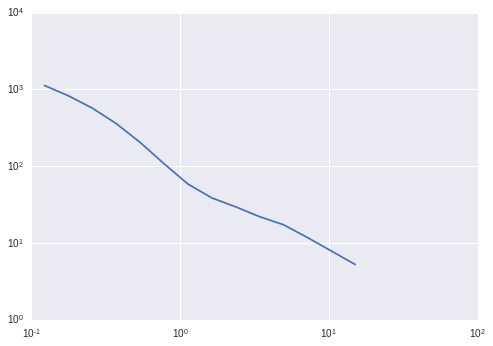

In [76]:
plt.plot(rp_points, wp)
plt.loglog()
plt.show()

In [77]:
theta_bins = np.logspace(-2,0,15)
theta_points = (theta_bins[:-1]+theta_bins[1:])/2.0
wt = cat.calc_wt(theta_bins)

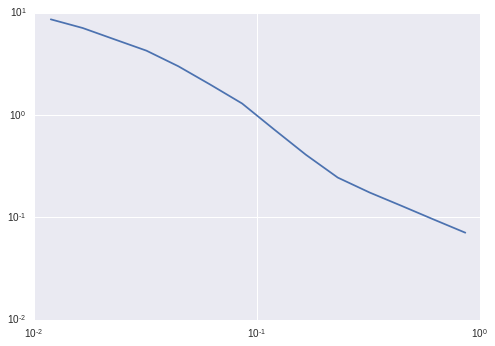

In [78]:
plt.plot(theta_points, wt)
plt.loglog()
plt.show()

In [79]:
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987])#, 7.29722764, \
           #10.24533859,  14.38449888,  20.1958975])# , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2
jk_args= {'n_rands':3, 'n_sub':3}

In [80]:
#%%timeit
#try another estimator?
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [81]:
errs = np.sqrt(np.diag(cov))
print errs

[  2.96181144e+02   4.10486666e+01   1.15106958e+01   3.76166822e+00
   1.46955772e+00   7.22819275e-01   2.59961975e-01   6.35824340e-02
   3.02377752e-02   1.82290645e-02   8.02116643e-03]


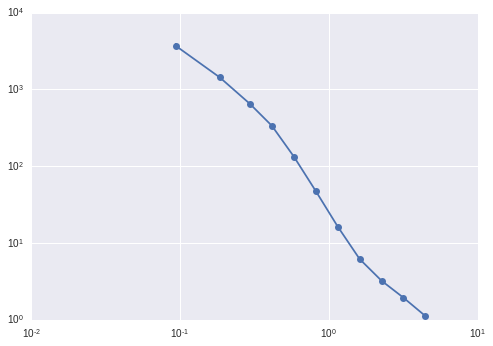

In [ ]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()

In [ ]:
#%%timeit
#try another estimator?
jk_args= {'n_rands':50, 'n_sub':3}
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [ ]:
errs = np.sqrt(np.diag(cov))
print errs

In [ ]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()